# 10. GLS 실습

김보람  
2023-05-25

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# WLSE

-   등분산성을 만족하지 않을 때! 하자

In [1]:
set.seed(2023)
x <- round(runif(20,1,15),2) 
y <- 20+5*x + rnorm(20,0,2)*x

-   $N(0,2)x \rightarrow N(0,2x^2)$

-   $Var(\epsilon)= \sigma^2$이 $x^2$에 비례

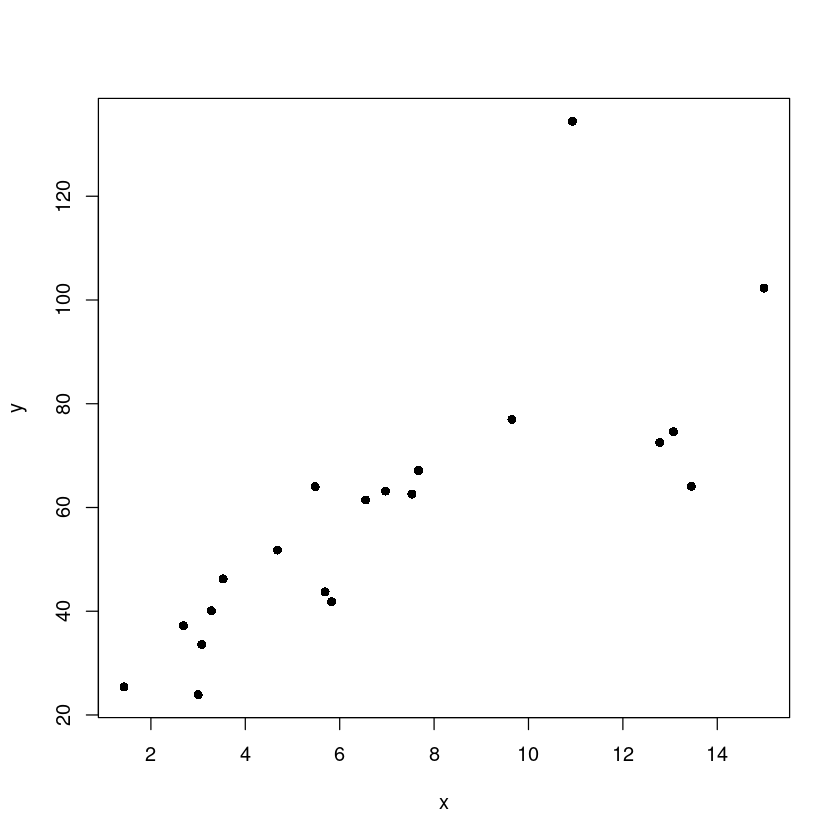

In [2]:
plot(y~x, pch=16)

-   X가 커지면서 분산도 커진다..

In [3]:
m <- lm(y~x)
m1 <- lm(y~x, weights = 1/x^2)

-   $Var(\epsilon) = \dfrac{\sigma^2}{w_i}=x^2 \sigma^2$

-   $w_i = \dfrac{1}{x^2}$

-   LSE는 $argmin \sum_{i=1}^n(y_i-\hat y_i)^2$

-   WLSE는 잔차 가중치의 제곱합을 가장 작게 해주는..

-   WLSE: $argmin \sum_{i=1}^n w_i (y_i - \hat y_i)^2$

-   MSE관점에서 더 좋은 추정량

`-` LSE

In [4]:
summary(m)

`-` WLSE

In [5]:
summary(m1)

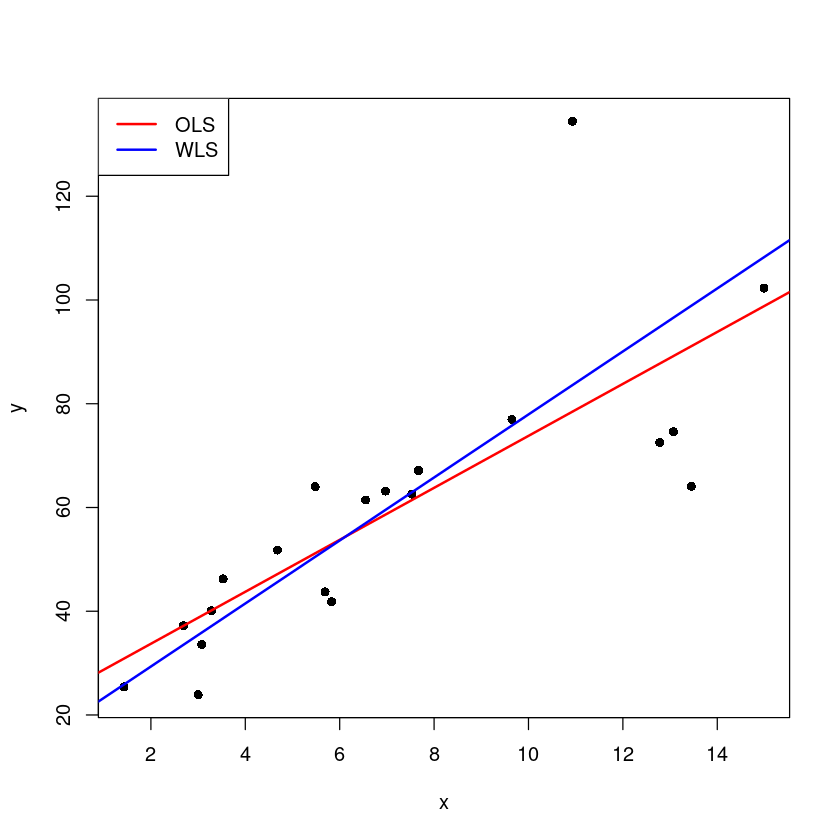

In [6]:
par(mfrow=c(1,1))
plot(x,y,pch=16)  
abline(m, col='red', lwd=2)
abline(m1, col='blue', lwd=2)
legend("topleft",c('OLS', "WLS"), lty=1,
        col=c('red', 'blue'), lwd=2)

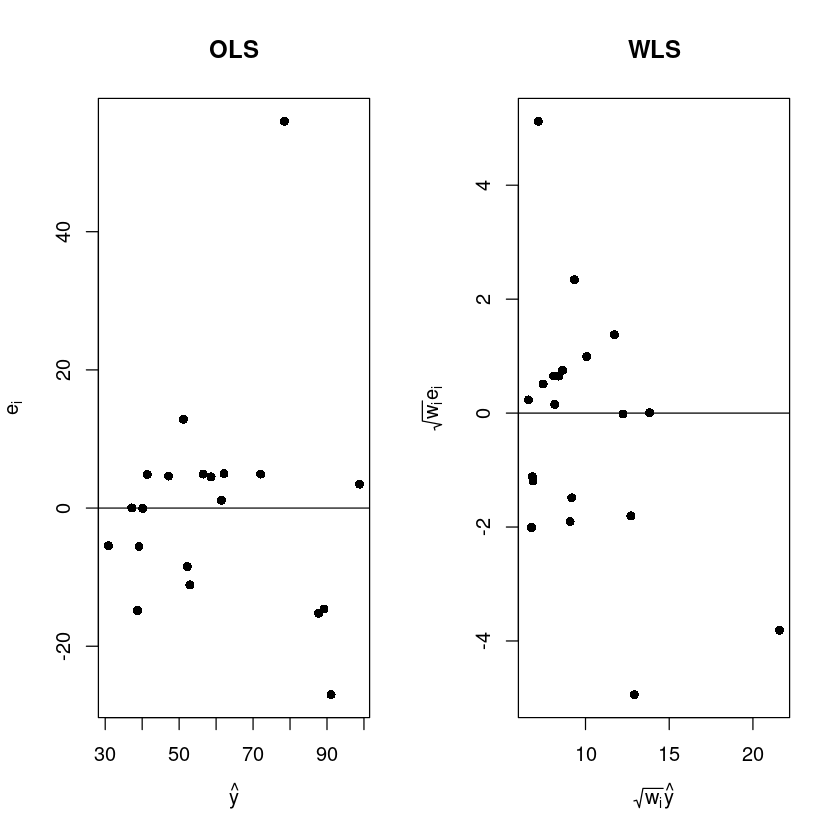

In [7]:
par(mfrow=c(1,2))
plot(fitted(m), resid(m),pch=16,xlab=expression(hat(y)), ylab=expression(e[i]),main="OLS") 
abline(h=0)
plot(fitted(m)/x, resid(m)/x,pch=16,xlab=expression(sqrt(w[i])*hat(y)), ylab=expression(sqrt(w [i])*e[i]), main="WLS")
abline(h=0)

-   OLS는 퍼져 있다.

-   WLS는
    $\sqrt{w_i}y_i = \sqrt{w_i}\beta_0 + \sqrt{w_i}\beta_1x_i + \sqrt{w_i} \epsilon_i$

-   $\sqrt{w_i} \epsilon_i$ ~ $N(0,2)$

-   $\sqrt{w_i} y_i = \hat y' = \beta_0' + \beta_1 x_i' + \epsilon_i'$

-   분산이 어느정도 안정화 됭

`-` OLS (LSE)

-   **y = X $\beta$ + $\epsilon$**

-   $\epsilon$ ~ $N(0_n, In\sigma^2)$

-   $\hat \beta = (X^TX)^{-1}X^Ty$

`-` GLS (WLSE)

-   **y = X $\beta$ + $\epsilon$**

-   $Var(\epsilon) = V\sigma^2$

-   $\hat \beta^{G} = (X^TV^{-1}X)^{-1}X^TV^{-1}y$

In [9]:
V<-diag(x^2)
X<-model.matrix(m)
V.inv<-solve(V)
beta<-solve(t(X)%*%V.inv%*%X)%*%t(X)%*%V.inv%*%y 
beta  

In [10]:
summary(m1)$coef

$lm(y$ ~ $x, wieght=\frac{1}{x^2})$

GLS구한거랑 WLS로 구한거랑 `6.074163` 값 동일

In [11]:
e2 <- y-(beta[1]+beta[2]*x) 
t(e2) %*% V.inv %*%e2 

In [12]:
anova(m1)

# 1차 자기상관 회귀모형

-   독립성을 만족하지 않을 때! 하자

In [13]:
dt <- read.csv("corr.csv")
head(dt)

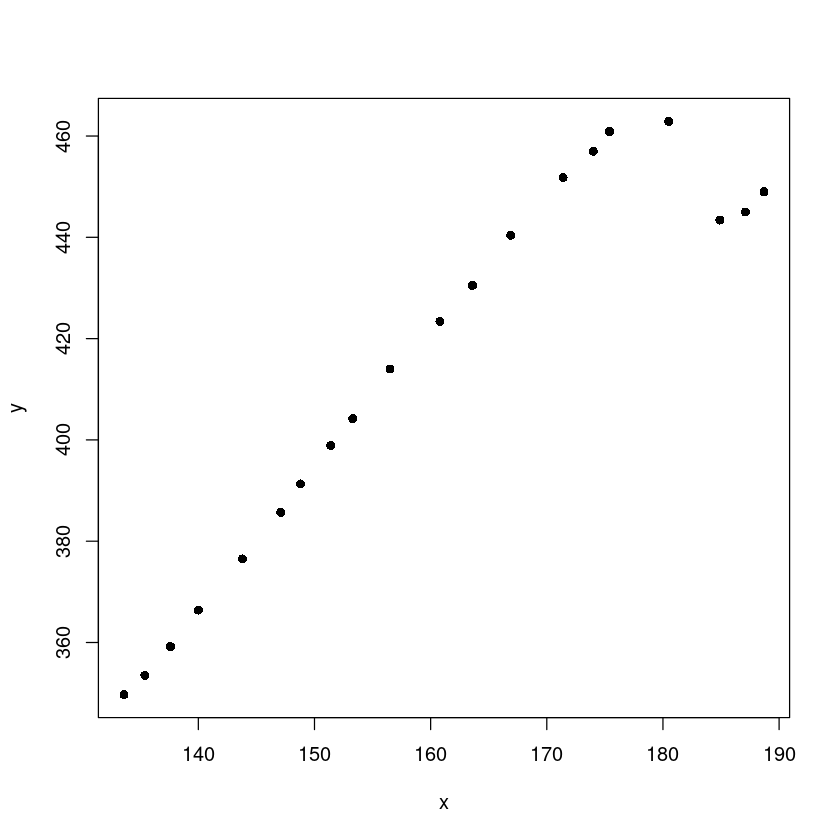

In [14]:
plot(y~x, dt, pch=16)

-   오른쪽 4개 데이터가 애매하다.

In [15]:
m <- lm(y~x, dt)

-   $y=\beta_0+\beta_x + \epsilon$

In [16]:
summary(m)

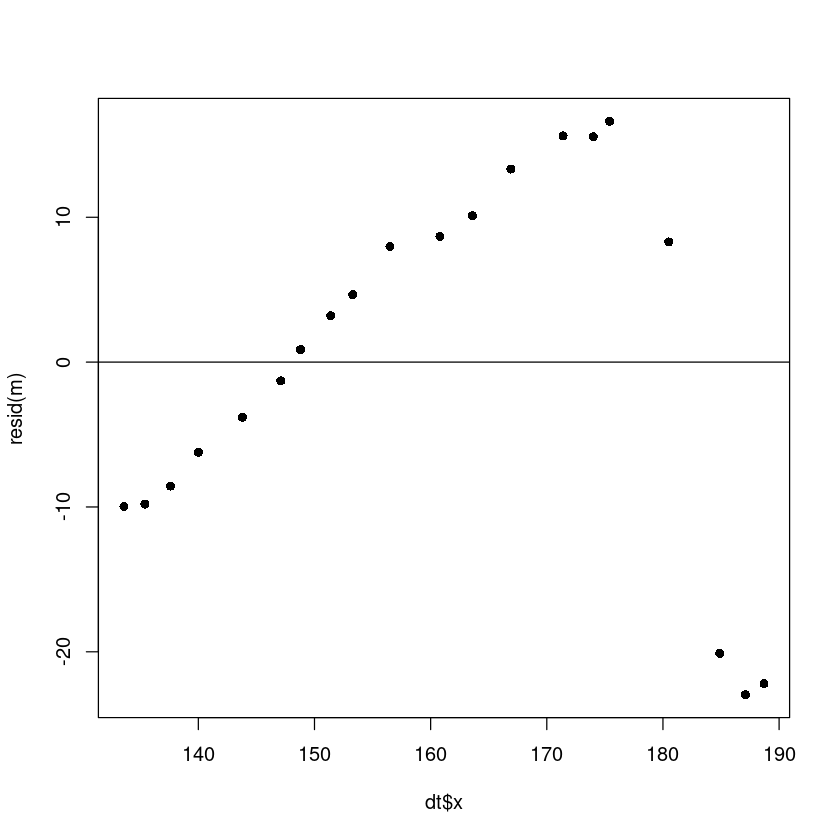

In [17]:
par(mfrow=c(1,1))
plot(dt$x, resid(m), pch=16) 
abline(h=0)

In [18]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [19]:
dwtest(m)

-   DW값이 0에 가까우므로 양의상관관계를 가진다.

-   2에 가까우면 상관관계가 0에 가까움

-   4에 가까우면 음의 상관관계에 가까움

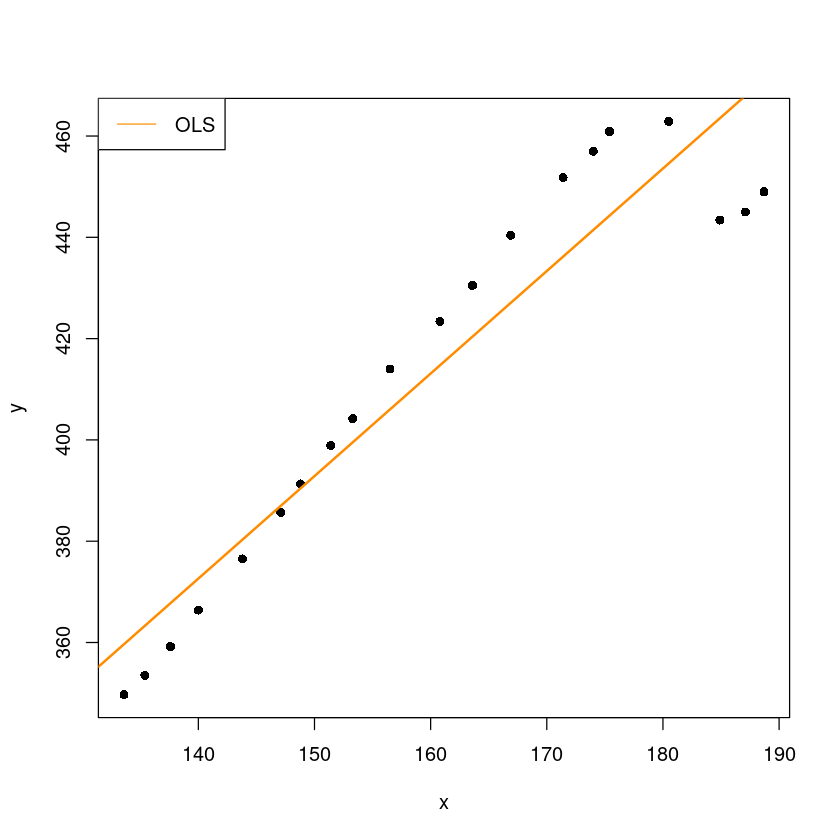

In [20]:
plot(y~x, dt, pch=16)
abline(m, col='darkorange', lwd=2)
legend("topleft", "OLS",col="darkorange", lty=1)

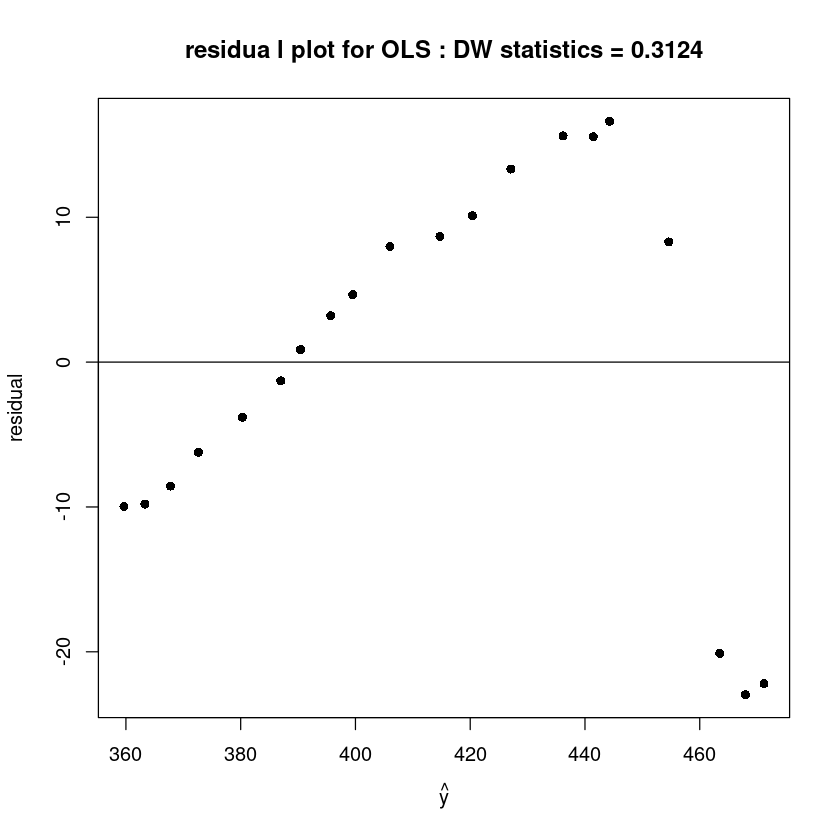

In [21]:
plot(fitted(m), resid(m), pch=16,xlab=expression(hat(y)), ylab='residual', 
     main=paste0("residua l plot for OLS : DW statistics = ", round(dwtest(m)$stat,4)))
abline(h=0)

## 변수변환

In [25]:
bar_e1 <- mean(resid(m)[-1])
bar_e2 <- mean(resid(m)[-20])
# hat_rho <- sum((resid(m)[-1]-bar_e1)*(resid(m)[-20] - bar_e2))/sum((resid(m)[-1]-bar_e1)^2) #일밎게 구하는거
hat_rho <- sum(resid(m)[-1]*resid(m)[-20])/sum((resid(m)[-20])^2)  #대략적으로 구하는거 
# hat_rho <- cor(resid(m)[-1], resid(m)[-20])

In [26]:
hat_rho

-   $Corr(\epsilon_i, \epsilon_j) \neq 0, i \neq j$

`-` 1차 자기상관 회귀모형

-   $y=\beta_0 + \beta_1 x + \epsilon$

-   $\epsilon_i = \rho \epsilon_{i-1} + \delta_i$

-   $\delta_i$ ~ $N(0,\sigma^2), iid$

-   현시점의 오차가 다음 시점의 오차에 영향을 준다. -\>시계열 데이터와
    관련된 모형

-   $y_i=\beta_0+\beta_1x_i + \epsilon_i$

-   $\rho y_{i-1} = \beta_0 + \beta_1 \rho x_{i-1} + \rho \epsilon_{i-1}$

-   $y_i - \rho y_{i-1}=(1-\rho)\beta_0 + \beta_1 (x_i - \rho x_{i-1}) + \epsilon_i - \rho \epsilon_{i-1}$

-   위를

-   $y' = \beta_0' + \beta_1'x_i' + \delta_i$

-   $\hat \rho = \dfrac{\sum_{i=2}^n e_i e_{i-1}}{\sum_{i=2}^n e_i^2}=0.891002040194419$

In [24]:
y1 <- dt$y[-1]-hat_rho*dt$y[-20] 
x1 <- dt$x[-1]-hat_rho*dt$x[-20]
m1 <- lm(y1~x1)
summary(m1)

In [27]:
dwtest(m1)

-   데이터가 많지 않아서 크게 dw가 차이나지 ㄴ않음..

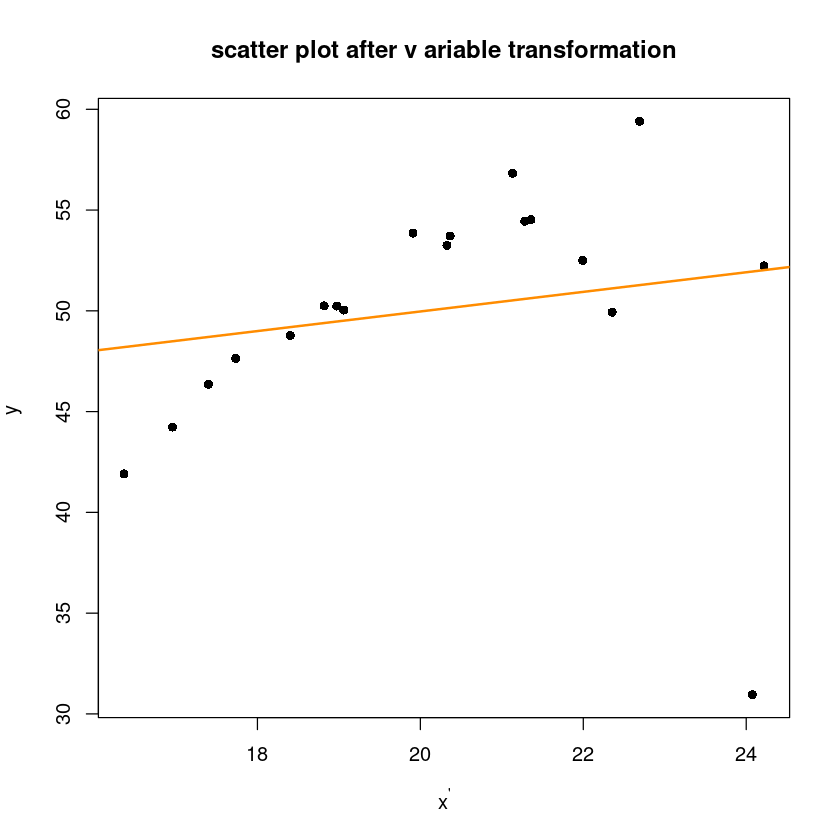

In [28]:
par(mfrow=c(1,1))
plot(y1~x1,pch=16,  xlab=expression(x^"'"),  ylab=expression(y^"'"), 
     main="scatter plot after v ariable transformation")
abline(m1, col='darkorange', lwd=2)

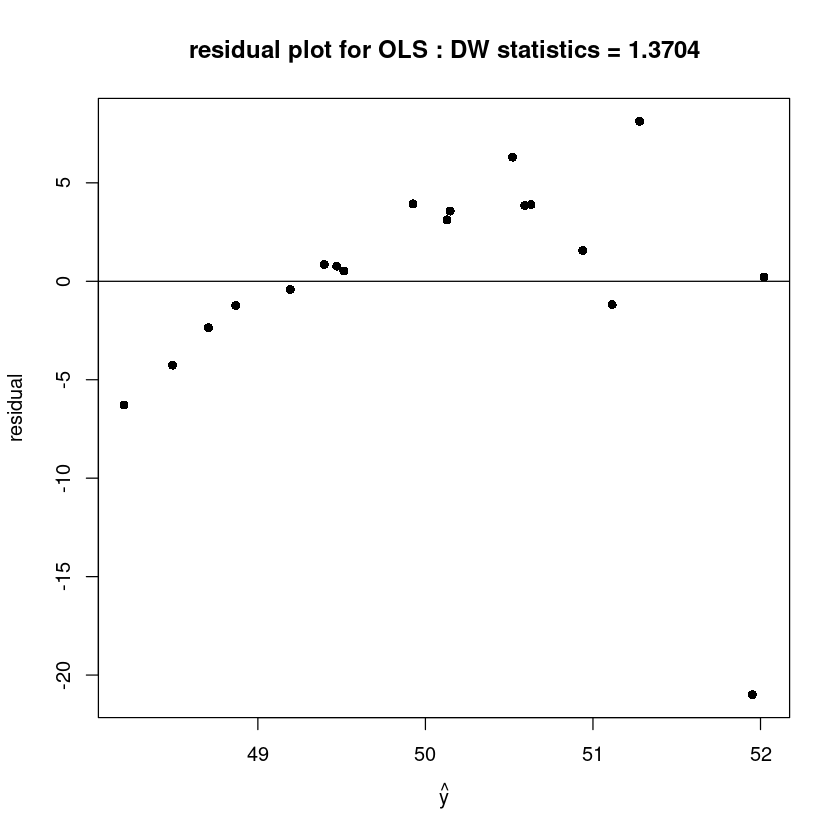

In [29]:
plot(fitted(m1), resid(m1), pch=16,xlab=expression(hat(y)), ylab='residual', 
     main=paste0("residual plot for OLS : DW statistics = ", round(dwtest(m1)$stat,4))) 
abline(h=0)

## GLS

In [30]:
V<-diag(20)
V<-hat_rho^abs(row(V)-col(V))
X<-model.matrix(m)
V.inv<-solve(V)
beta<-solve(t(X)%*%V.inv%*%X)%*%t(X)%*%V.inv%*%dt$y 
beta

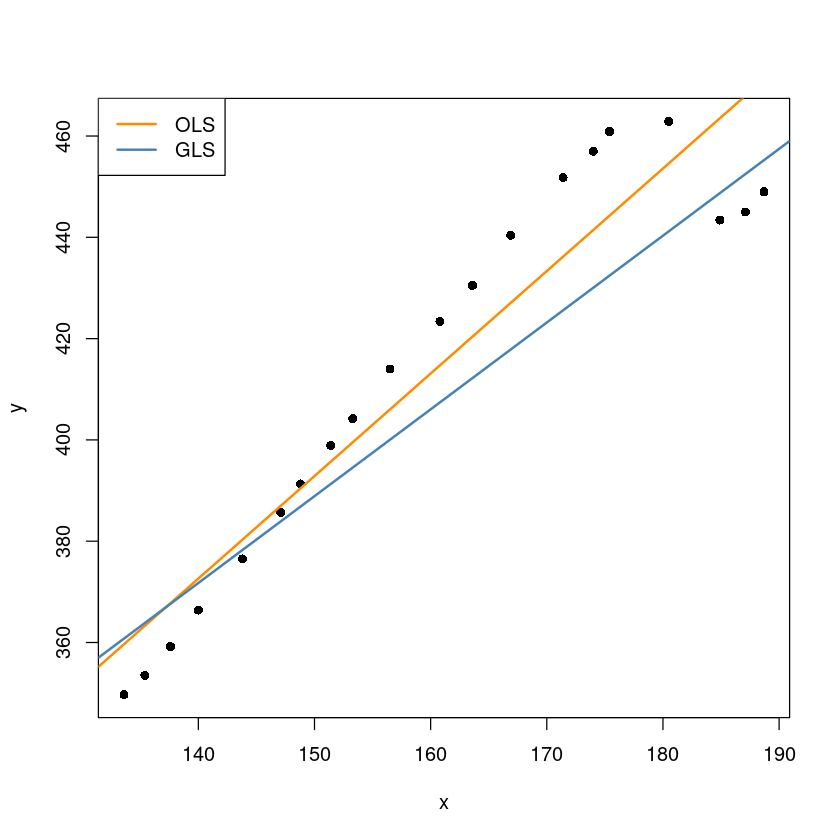

In [31]:
plot(y~x, dt, pch=16)
abline(m, col='darkorange', lwd=2)
abline(beta[1], beta[2], col='steelblue', lwd=2)
legend("topleft", c("OLS", "GLS"),col=c("darkorange", 'steelblue'), lty=1, lwd=2)

`-` 시간 변수를 더 추가해보자.

In [32]:
dt$t <- 1:nrow(dt)

m2 <- lm(y~t, dt) 
summary(m2)

In [33]:
summary(m)